## İSTATİSTİK

Bu bölümde öğreneceklerimiz:

Sampling (Örnekleme)

Central Limit Theorem (Merkezi Limit Teoremi)

Standard Error

Hypothesis Testing

Hypothesis Testing Real-World Örneği 1

Hypothesis Testing Real-World Örneği 2

Type 1 ve Type 2 Errors

T-Distribution

A/B Test

### Sampling (Örnekleme)

Sampling büyük bir gruptan rastgele bireyler seçerek küçük bir grup oluşturmaktır.

Burada önemli olan bir yere bias'lanmadan sampling yapabilmektir.

Bias ne demek? Mesela bir maç sonucu tahmini yapmak istiyoruz. Galatasaray - Fenerbahçe Maçı var. İlk önce kendimiz gidip sampling yaparak bir grup oluşurmak zorundayız. Eğer bizim sub grubumuzun member'larını sadece Galatasaray taraftarından seçersek biz bias'lanmış oluruz. Bias eğilim demek. Böylece istatistiksel analiz sonucumuz Galatasaray eğilimli bir sonuç verir.

Sampling Types:

Random Sampling:

    Bir grup içinden rastgele seçim yapmaktır.
    
    Örneğin, bir futbol maçında forma rengine bakmadan rastgele seyirci seçmek.

Stratified(katmanlı) Random Sampling:

    İlk önce belirli bir karakteristiğe göre büyük grubu segment'lere ayır. Daha sonra bu segmentler içerisinden seç.

    Örneğin, bir futbol maçında ilk önce seyirciyi takımlarına göre segment'lere ayırıp daha sonra seçim yapmak. Daha sonra gruplardan random seçmek.

Cluster Sampling:

    Bir populasyonu birden fazla küçük gruba bölerek grup seçmektir.

    Mesela öğrenci başarısı araştırması yapılmak isteniliyor. Tüm population yani Türkiye farklı cluster'lara bölünüyor yani şehirlere daha sonra bu clusterlardan bazıları seçilerek araştırma yapılıyor.
    
Stratified vs. Cluster:

Stratified'te az sayıda gruplara bölüm yapılır. Cluster'da ise çok fazla grup sayısı olur.

Stratified'te gruplar içerisinde homojen bir dağılım vardır. Cluster'da gruplar içerisinde heterojen dağılım vardır.

Stratified'te gruplar arasında heterojenlik vardır. Cluster'da gruplar arasında homojenlik vardır.

### Central Limit Theorem (Merkezi Limit Teoremi)

Merkezi limit teoremi büyük bir sayıda olan bağımsız ve aynı dağılım gösteren rassal değişkenlerin aritmetik ortalamasının, yaklaşık olarak normal dağılım göstereceğini ifade eden bir teoremdir.

Mean value from a sub group will be normally distributed about the population mean.

<br>
<img src="p1.png" align = "left" style="width:500px;height:300px"/>

Grafikte gördüğünüz siyah line popülasyondur. Büyük grubu sub sample yani gruplama yaptığımız zaman normal distribution'u elde ederiz.

Popülasyondan rastgele sampling yaparsak yani sub grubu oluşturursak, bu popülasyonun tam ortasında gaussian distribution yapıyor. Yani x değerlerinin ortalaması yukarıda gördüğünüz kısmızı alanın içerisinde dağılıyor.

Bu teoremi denemek için kod yazalım.

C:\Users\raziy\AppData\Local\Temp\ipykernel_3756\2033070511.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  x = np.random.random_integers(10,size=100000)


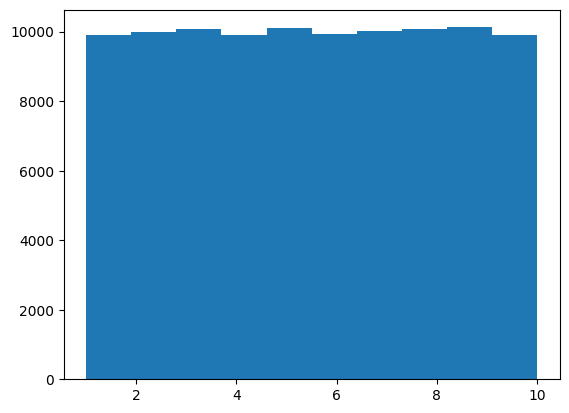

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.random_integers(10,size=100000)
plt.hist(x)
plt.show()

x = np.random.random_integers(10,size=100000) satırında 1'den 10'a kadar olan sayılardan 100000 tane uniform distribution yapılmıştır.

Yukarıdaki şekilde ortalama 5.5'tir. Teorem diyor ki, bunun içinden rastgele sample'ler alıcam ve aldığımız sample'ler normal population'un ortalamasında gaussian dağılım yapacaktır. Bu işlemin kodunu yapalım.

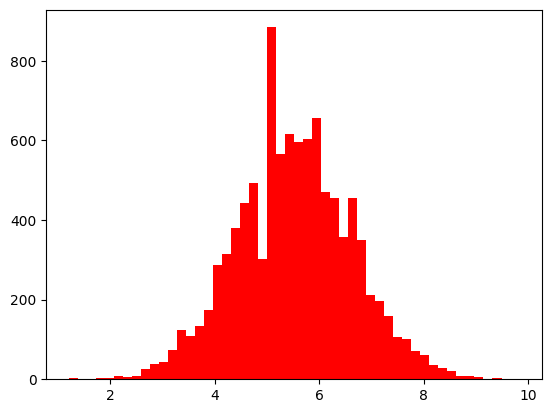

In [2]:
import random
mean_sample = []
for i in range(10000):  #10000 tane sample popülasyon içerisinden rastgele alınmıştır.
    sample = random.randrange(5,10)
    mean_sample.append(np.mean(random.sample(list(x),sample)))
plt.hist(mean_sample,bins = 50, color = "red")
plt.show()

Gaussian distribution elde ettiğimiz zaman popülasyonla ilgili genellemeler yapabiliyoruz.

Central Limit Theorem kullanarak popülasyon hakkında genel istatistiksel değerlere sahip olabiliriz.

### Standard Error

Standart hata bir sınamada seçilebilecek tüm örneklemlerden sadece bir tanesine dayalı kestirimlerin içerdiği hata oranıdır.

N = populationda ki birey sayısı

P = population parameter

sigma = population standard deviation

n = sampling yaptıktan sonra sub-grupta ki birey sayısı

p = sample statistic

SE = standart error of sample

<br>
<img src="p2.png" align = "left" style="width:100px;height:50px"/>


Örnek yapalım:

Bir populasyonun IQ seviyesi gaussian distribution şeklinde olsun.

    Mean = 100 ve std = 15

Elimizde 10 farklı kişi var ve IQ ortalaması 104. Biz bu 10 kişi için populasyonumuzun bireyleri diyebilir miyiz?

n = 10, x = 104

SE = 15/root(10) = 4.7

Bu sonuca göre diyebiliriz ki 10 bireyin IQ'su 68% olasılıkla 100-4.7=95.3 ve 100+4.7=104.7 arasındadır. Buradaki 100, mean değeridir.

### Hypothesis Testing

Hypothesis Testing, istatistiksel metotların real-world (gerçek dünya) problemlerine uygulanmasıdır.

Null Hypothesis mesela dünya düzdür. Bu hipotez ya reject yada fail to reject olur.

Hypothesis Testing'te 2 tane önemli kavram var:

    reject: reddetmek. Hipotezin yanlış olduğunu ispatlamaktır.

    fail to reject: reddetmemek. Hipotezin yanlış olduğunu ispatlayamamaktır.
    
Hypothesis Testing, doğru bir şeyi kanıtlamaktansa bir tane hipotez ortaya atıyoruz ve bunun çürük, yanlış olduğunu ispatlamaya çalışıyoruz.

Bir tane alternate hypothesis oluştururuz. Eğer null hypothesis reject edilirse otomatik olarak altenarte hypothesis doğrudur. Mesela dünya yuvarlaktır alternate hipotezini oluştuabiliriz.

Gerçek dünya problemini nasıl hypothesis'e dönüştürdüğümüze bakalım.

    İlk önce bir null hypothesis oluşturuyoruz, başlangıçta bu null hypothesis doğru (true) olarak kabul ediyoruz ve sonra 

    çürütmeye(reject) çalışıyoruz. Eğer data null hypothesis'i reject ederse alternative hypothesis'ler oluşturmaya başlıyoruz.
    
    Örnek:

    Null hypothesis "Ankara'da insanların boy ortalaması 2 metre" olsun.

    Null hypothesis: average height = 2 m

    Alternate hypothesis "Ankara'da insanların boy ortalaması 2 metre değil"

    Alternate hypothesis: average height != 2 m

    Başlangıçta null hypothesis doğru olarak kabul ediyoruz demiştik. Şimdi ilk önce verimizi topluyoruz.

    Sonra test istatistiklerini (test statistic = z value) kullanarak p-value'yu buluyoruz.

    p-value'yu 0.05 ile karşılaştırıyoruz. 0.05 = level of significance

    Eğer p-value < 0.05(level of significance) (confidence level 95%)

    Null hypothesis'i reject ediyoruz, yani reddediyoruz. If p-value is low, we conclude that null hypothesis is unlikely to be true

    Eğer p-value > 0.05(level of significance) fail to reject ediyoruz. Yani reddedemiyoruz.

### Hypothesis Testing Real-World Örneği

Datamız ile lgili bir örnek yapalım:

Null hypothesis = relationship between radius_mean and area_mean is zero in tumor population.

Alternate hypothesis = relationship between radius_mean and area_mean is not zero in tumor population.

lets find p-value (probability value)

In [6]:
import pandas as pd
from scipy import stats

data = pd.read_csv("data.csv")

In [7]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


P values sıfır bu nedenle reject null hypothesis.

Null hypothesis = "relationship between radius mean and area mean is zero in tumor population" reddedildi. Alternate hypothesis doğrudur.

Alternate hypothesis = relationship between radius_mean and area_mean is not zero in tumor population

### Type 1 ve Type 2 Errors

tip 1 ve tip 2 hatalarıdır.

<br>
<img src="p3.png" align = "left" style="width:900px;height:500px"/>

Null hypothesis, reject edilebiliyordu yani reddedilebiliyordu, ya da fail to reject yani reddedilemiyordu. Null hypothesis, gerçekte doğru olabiliyordu ya da yanlış olabiliyordu.

Mesela "dünya düzdür" şeklinde bir Null Hypothesis belirleyelim. Bunu reject ettiğimizde "dünya düz değildir" şeklinde reddetmiş oluyoruz ve bu durumda "dünya yuvarlaktır" kabul edilmiş oluyor. 

Null hypothesis'i reddedeceğiz. Fakat Null hypothesis gerçekte doğru ise bu Type1 (false positive) error'dur.

Null hypothesis'i reddetmiyoruz. Fakat Null hypothesis gerçekte yanlış ise bu Type2 (false negative) error'dur.

### T-Distribution

Student's T-Distribution da denir.

Ortalama değerleri aynı olan dağılımlar aslında variance açısından farklılık gösterebilir.

<br>
<img src="p4.png" align = "left" style="width:900px;height:900px"/>

İlk görselde üst kısımdaki ile alt kısımdaki grafikler aynı görünmektedir. Statistical significant açısından bu iki dağılım arasında bir farklılık olup olmadığını T-Distribution ile öğrenelim.

İkinci görselde formül bulunmaktadır.

mean 1:  14.879005879375
standart deviation 1:  0.4106367159180011
variance 1:  0.16862251245992116
mean 2:  15.17467023375
standart deviation 2:  0.29561498265957253
variance 2:  0.08738821797281937


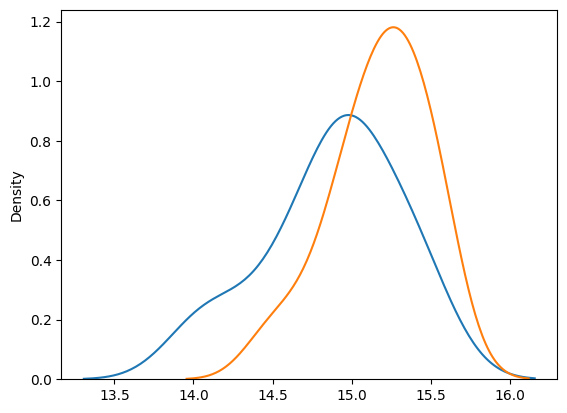

In [8]:
s1 = np.array([14.67230258, 14.5984991 , 14.99997003, 14.83541808, 15.42533116,
       15.42023888, 15.0614731 , 14.43906856, 15.40888636, 14.87811941,
       14.93932134, 15.04271942, 14.96311939, 14.0379782 , 14.10980817,
       15.23184029])
print("mean 1: ", np.mean(s1))
print("standart deviation 1: ", np.std(s1))
print("variance 1: ", np.var(s1))
s2 = np.array([15.23658167, 15.30058977, 15.49836851, 15.03712277, 14.72393502,
       14.97462198, 15.0381114 , 15.18667258, 15.5914418 , 15.44854406,
       15.54645152, 14.89288726, 15.36069141, 15.18758271, 14.48270754,
       15.28841374])
print("mean 2: ", np.mean(s2))
print("standart deviation 2: ", np.std(s2))
print("variance 2: ", np.var(s2))
# visualize with pdf
import seaborn as sns
sns.kdeplot(s1)
sns.kdeplot(s2)
plt.show()

In [9]:
t_val = np.abs(np.mean(s1)-np.mean(s2))/np.sqrt((np.var(s1)/len(s1))+(np.var(s2)/len(s2)))
print("t-value: ", t_val)

t-value:  2.3373829708002227


Şimdi null hypothesis belirleyelim.

Null hypothesis: bu iki distribution arasında statistical significance açısından fark yoktur.

Yani Null hypothesis, bu iki grafiğin aynı olduğunu söylüyor.

Eğer t value critical value dan küçük ise null hypothesis'i fail to reject edilir. Yani reddedilmiyor, doğrudur deniyor.

Eğer t value critical value dan büyük ise null hypothesis'i reject edilir. Yani reddedilir.

<br>
<img src="p5.png" align = "left" style="width:400px;height:400px"/>

critical value için yukarıda gördüğünüz t table'a bakalım.

0.05: 100 kere yaparsak null hypothesis 95 kere reject edilecektir.

degrees of freedom: N1+N2-2

2.3 > 2.04 bu nedenle reject null hypothesis'dir.

### A/B Test

A/B Test, A ve B diye iki farklı içeriğe sahip model için yaratılır.

A/B Test genellikle internet siteleri için kullanılır.

A ve B içerikleri farklı kullanıcılara sunulur.

Kullanıcılardan alınan geri bildirime göre A/B içeriklerinin başarımı elde edilir.

Mesela sadece arayüzleri farklı iki siteyi farklı insanlara sunalım. Mesela birisine %68 kişi tıklamış olsun, diğerine %32 kişi tıklamış olsun. Ve elde edilen bu başarımlara göre durum değerlendiriliyor.